In [59]:
# Import Data manipulation Libraries

import pandas as pd
import numpy as np

# Import Data Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt

# import filter warnings library

import warnings
warnings.filterwarnings('ignore')

# import logging library

import logging
logging.basicConfig(filename = "model.log",
                    level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')
                    


In [60]:
# Load the dataset

D1 = ('https://raw.githubusercontent.com/adnansayyedd/Energy_Consumption_Prediction_MLModel/refs/heads/main/train_energy_data.csv')
D2 = ('https://raw.githubusercontent.com/adnansayyedd/Energy_Consumption_Prediction_MLModel/refs/heads/main/test_energy_data.csv')

df1 = pd.read_csv(D1)
df2 = pd.read_csv(D2)


In [61]:
# Combining both datasets

df = pd.concat([df1, df2], axis = 0)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 68.8+ KB


In [63]:
# Checking the null Values

df.isnull().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [64]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,25500.527273,48.268182,25.730000,22.559745,4168.191273
std,14236.955632,29.127624,14.116209,7.122357,924.278723
min,560.000000,1.000000,1.000000,10.050000,1683.950000
25%,13203.750000,22.000000,13.000000,16.365000,3510.460000
50%,25785.500000,47.000000,26.000000,22.810000,4189.690000
75%,37536.750000,73.000000,38.000000,28.760000,4859.510000
max,49997.000000,99.000000,49.000000,34.990000,6530.600000


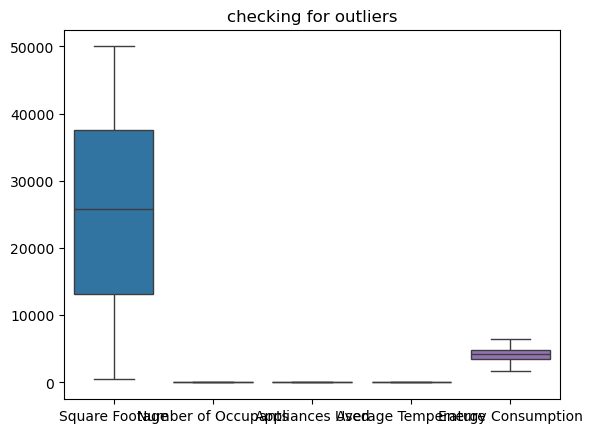

In [65]:
sns.boxplot(df)
plt.title('checking for outliers')
plt.show()

In [66]:
from collections import OrderedDict

stats = []

for i in df.columns:
    if df[i].dtype != 'object':
      Numerical_stats = OrderedDict({
        'feature' : i,
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Min' : df[i].min(),
        'Max' : df[i].max(),
        'Skewness' : df[i].skew(),
        'Kurtosis' : df[i].kurtosis(),
        'Standard Deviation' : df[i].std(),
        'variance' : df[i].var()
      })
      stats.append(Numerical_stats)

    stats_df = pd.DataFrame(stats)
    
stats_df

,feature,Mean,Median,Mode,Min,Max,Skewness,Kurtosis,Standard Deviation,variance
0,Square Footage,25500.527273,25785.50,11289.00,560.00,49997.00,-0.009364,-1.170704,14236.955632,2.026909e+08
1,Number of Occupants,48.268182,47.00,21.00,1.00,99.00,0.095382,-1.246361,29.127624,8.484185e+02
2,Appliances Used,25.730000,26.00,45.00,1.00,49.00,-0.047299,-1.192505,14.116209,1.992673e+02
3,Average Temperature,22.559745,22.81,16.24,10.05,34.99,-0.035257,-1.173093,7.122357,5.072797e+01
4,Energy Consumption,4168.191273,4189.69,1683.95,1683.95,6530.60,-0.060156,-0.565316,924.278723,8.542912e+05


In [67]:
# Label Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

df['Building Type'] = LE.fit_transform(df['Building Type'])

df['Day of Week'] = LE.fit_transform(df['Day of Week'])

df.sample(frac=1)




,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
708,2,29234,39,17,34.43,1,3519.56
457,0,2250,11,4,22.11,0,2241.96
541,0,29365,18,24,12.93,1,4063.62
980,0,21788,21,9,21.56,1,3371.60
810,1,47795,9,15,34.61,0,5156.72
...,...,...,...,...,...,...,...
798,1,31311,60,27,17.31,0,5168.99
990,1,48337,69,44,15.67,0,6458.51
159,2,3208,68,29,14.07,1,2850.05
0,2,24563,15,4,28.52,0,2865.57


<Axes: >

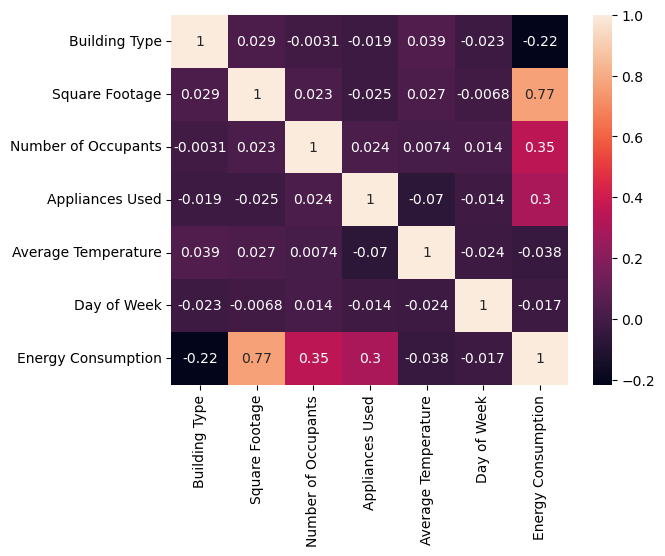

In [68]:
df.corr()['Energy Consumption'].sort_values(ascending=False)
sns.heatmap(df.corr(), annot=True)

In [69]:
# Splitting the dataset into X and y

from sklearn.model_selection import train_test_split

X = df.drop('Energy Consumption', axis = 1)
y = df['Energy Consumption']

# Splitting the dataset into training set and test set

from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



In [70]:
# scaling the features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [71]:
# import the random forest regressor model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

RF = RandomForestRegressor()

RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

r2_score_RF = r2_score(y_test, y_pred_RF)

r2_score_RF

0.9750668908668306

In [72]:
from sklearn.linear_model import LinearRegression

lR = LinearRegression()

lR.fit(X_train, y_train)

y_pred_LR = lR.predict(X_test)

r2_score_LR = r2_score(y_test, y_pred_LR)

r2_score_LR

0.8558894689449238

In [73]:
# Desicion Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_score_DT = r2_score(y_test, y_pred_dt)

r2_score_DT

0.9188312832787127

In [74]:
# Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

r2_score_ridge = r2_score(y_test, y_pred_ridge)

r2_score_ridge

0.8560159403691033

In [75]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred_Lasso = lasso.predict(X_test)

r2_score_lasso = r2_score(y_test, y_pred_Lasso)

r2_score_lasso

0.8560403238906485

In [78]:
# evaluating the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_RF = mean_squared_error(y_test, y_pred_RF)

mae_RF = mean_absolute_error(y_test, y_pred_RF)

r2_score_RF = r2_score(y_test, y_pred_RF)

In [79]:
print('Mean Squared Error:', mse_RF)

print('Mean Absolute Error:', mae_RF)

print('R2 Score:', r2_score_RF)


Mean Squared Error: 20818.21429890993
Mean Absolute Error: 115.73790878787915
R2 Score: 0.9750668908668306
